# Computer Vision Assignments: Sessions 1 & 2

This notebook contains tasks and assignments based on Sessions 1 and 2. You are required to implement the functions and complete the exercises as described. Use OpenCV and other necessary libraries like NumPy and Matplotlib.

**Instructions:**
- Complete each task in the provided code cells.
- Test your implementations with sample images (e.g., download test images [here](https://sipi.usc.edu/database/database.php?volume=misc) or [here](https://www.hlevkin.com/hlevkin/06testimages.htm) or use your own test images).
- Include comments in your code for clarity.
- Display results using cv2.imshow() or Matplotlib where appropriate.
- Submit the completed notebook along with any output images or explanations on [our google drive for the CV sessions](https://drive.google.com/drive/folders/1IjVhJmAXxNQTGT-ybJ-yc5smYtR5v8CO?usp=sharing) **upload your files in a new folder under your name**

## Session 1: Basic Image Operations (Reading, Resizing, Cropping, Rotating)

### Task 1: Read and Display an Image
Read an image from a file and display it in both BGR and grayscale formats. Handle errors if the image cannot be read.

In [4]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here
path = r'C:\Users\OPT\OneDrive\Desktop\sky\Session1\Task\female.png'  # Replace with your image path

# Read in BGR
img_bgr = cv.imread(path)

# Read in Grayscale
grayimage = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)

# Display both using cv.imshow() or plt.imshow()
cv.imshow('BGR Image', img_bgr)
cv.imshow("Gray image",grayimage)
cv.waitKey(0)
cv.destroyAllWindows()


### Task 2: Resize Image with Aspect Ratio Preservation
Implement resizing while preserving aspect ratio. Downscale to 60% and upscale to 200%. Compare shapes and display originals vs resized.

In [5]:
# Your code here
# Load image

# Downscale to 60%
Scale_percent = 60
h,w , _ = img_bgr.shape
h = int(Scale_percent *h / 100)
w = int(Scale_percent * w / 100 )
dim = (h,w)

down_img = cv.resize(img_bgr, dim , interpolation = cv.INTER_AREA)

# Upscale to 200%
Scale_percent = 200
h,w , _ = img_bgr.shape
h = int(Scale_percent *h / 100)
w = int(Scale_percent * w / 100 )
dim = (h,w)

UP_img = cv.resize(img_bgr, dim , interpolation = cv.INTER_AREA)

# Display all three
cv.imshow('Original Image', img_bgr)
cv.imshow('Downscaled Image', down_img)
cv.imshow('Upscaled Image', UP_img)
cv.waitKey(0)
cv.destroyAllWindows()

### Task 3: Resize Without Preserving Aspect Ratio
Resize only width to 100 pixels, only height to 200 pixels, and both to (200, 200). Display and discuss distortions.

In [6]:
# Your code here

h,w , _ = img_bgr.shape
h = h
w = 100
dim = (h,w)

Width_img = cv.resize(img_bgr, dim , interpolation = cv.INTER_AREA)


h,w , _ = img_bgr.shape
h = 200
w = w
dim = (h,w)

Height_img = cv.resize(img_bgr, dim , interpolation = cv.INTER_AREA)

h,w , _ = img_bgr.shape
h = 200
w = 200
dim = (h,w)

HW_img = cv.resize(img_bgr, dim , interpolation = cv.INTER_AREA)

cv.imshow("Orignal", img_bgr)
cv.waitKey(0)
cv.imshow("Width image ", Width_img)
cv.waitKey(0)
cv.imshow("Height image ", Height_img)
cv.waitKey(0)
cv.imshow("Height and Width image ", HW_img)
cv.waitKey(0)
cv.destroyAllWindows()

### Task 4: Resize Using Scale Factors (fx, fy)
Scale up by 1.2 in both directions and down by 0.6. Use different interpolations (INTER_LINEAR, INTER_NEAREST) and compare quality.

In [7]:
# Your code here
# Experiment with interpolations

# Scaling Up the image 1.2 times by specifying both scaling factors
scale_up_x = 1.2
scale_up_y = 1.2
# Scaling Down the image 0.6 times specifying a single scale factor.
scale_down = 0.6

scaled_f_down = cv.resize(img_bgr, None, fx= scale_down, fy= scale_down, interpolation= cv.INTER_LINEAR)
scaled_f_up = cv.resize(img_bgr, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv.INTER_NEAREST)
cv.imshow("Scaled Down Image", scaled_f_down)
cv.waitKey(0)
cv.imshow("Scaled Up Image", scaled_f_up)
cv.waitKey(0)
cv.destroyAllWindows()


### Task 5: Cropping an Image
Crop a region (e.g., [20:200, 50:200]) from the image. Display original and cropped.

In [8]:
# Your code here
Cropped_img = img_bgr [20:200 , 50:200]
cv.imshow("Orignal", img_bgr)
cv.waitKey(0)
cv.imshow("Cropped img ", Cropped_img)
cv.waitKey(0)
cv.destroyAllWindows()


### Task 6: Advanced Cropping - Patch Image into Blocks
Divide the image into 4 equal blocks (2x2 grid) by cropping. Display each block separately and then stitch them back using NumPy concatenation to verify.

In [9]:
# Your code here
# Calculate midpoints for height and width
h, w , _ = img_bgr.shape
mid_h = h // 2
mid_w = w // 2

# Crop into top-left, top-right, bottom-left, bottom-right
top_left = img_bgr[0:mid_h, 0:mid_w]
top_right = img_bgr[0:mid_h, mid_w:w]
bottom_left = img_bgr[mid_h:h, 0:mid_w]
bottom_right = img_bgr[mid_h:h, mid_w:w]

# Display each
cv.imshow("Top Left", top_left)
cv.waitKey(0)
cv.imshow("Top Right", top_right)
cv.waitKey(0)
cv.imshow("Bottom Left", bottom_left)
cv.waitKey(0)
cv.imshow("Bottom Right", bottom_right)
cv.waitKey(0)
cv.destroyAllWindows()

# Stitch back (use np.hstack and np.vstack)
top = np.hstack((top_left, top_right))
bottom = np.hstack((bottom_left, bottom_right))
stitched_img = np.vstack((top, bottom))
cv.imshow("Stitched Image", stitched_img)
cv.waitKey(0)
cv.destroyAllWindows()

### Task 7: Rotating an Image
Rotate the image by 45°, 90°, and 180° using getRotationMatrix2D and warpAffine. Display all rotations.

In [10]:
# Your code here
# Calculate center
h, w , _ = img_bgr.shape
center = (w / 2, h / 2)

# For each angle: get matrix, warp, display
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=45, scale=1)
rotate_matrix

rotated_image = cv.warpAffine(src=img_bgr, M=rotate_matrix, dsize=(w, h))
print(img_bgr.shape)
print(rotated_image.shape)


rotate_matrix_90 = cv.getRotationMatrix2D(center=center, angle = 90, scale=1)
rotate_matrix_180 = cv.getRotationMatrix2D(center=center, angle = 180, scale=1)

rotated_image_90 = cv.warpAffine(src=img_bgr, M=rotate_matrix_90, dsize=(w, h))
rotated_image_180 = cv.warpAffine(src=img_bgr, M=rotate_matrix_180, dsize=(w, h))

cv.imshow("Orignal", img_bgr)
cv.waitKey(0)
cv.imshow("Rotated image 45 ", rotated_image)
cv.waitKey(0)
cv.imshow("Rotated image 90 ", rotated_image_90)
cv.waitKey(0)
cv.imshow("Rotated image 180 ", rotated_image_180)
cv.waitKey(0)
cv.destroyAllWindows()


(200, 200, 3)
(200, 200, 3)


### Task 8: Rotate with Scaling
Rotate by 45° and scale by 0.5 in **one** operation. Compare with separate resize and rotate.

In [11]:
# Your code here
h, w , _ = img_bgr.shape
center = (w / 2, h / 2)

rotate_matrix = cv.getRotationMatrix2D(center=center, angle=45, scale=0.5)
rotated_image = cv.warpAffine(src=img_bgr, M=rotate_matrix, dsize=(w, h))
cv.imshow("Orignal", img_bgr)
cv.waitKey(0)
cv.imshow("Rotated image 45 and scaled 0.5 ", rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()

## Session 2: Image Acquisition, Formats, Color Spaces, Enhancement, and Filtering

### Task 9: Read Image in Different Color Spaces
Read an image in BGR, convert to RGB (for Matplotlib), HSV, LAB and Grayscale. Display all.

In [12]:
# Your code here
# Use cv.cvtColor()
path2 = r'C:\Users\OPT\OneDrive\Desktop\sky\Session1\Task\house.png'
img_bgr2 = cv.imread(path2)
img_rgb = cv.cvtColor(img_bgr2, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_bgr2, cv.COLOR_BGR2GRAY)
img_hsv = cv.cvtColor(img_bgr2, cv.COLOR_BGR2HSV)
img_lab = cv.cvtColor(img_bgr2, cv.COLOR_BGR2Lab)
cv.imshow("BGR Image", img_bgr2)
cv.waitKey(0)
cv.imshow("RGB Image", img_rgb)
cv.waitKey(0)
cv.imshow("Gray Image", img_gray)
cv.waitKey(0)
cv.imshow("HSV Image", img_hsv)
cv.waitKey(0)
cv.imshow("Lab Image", img_lab)
cv.waitKey(0)
cv.destroyAllWindows()

### Task 10: Image Sharpening
Apply cv2.blur() with a 5x5 kernel, then use cv2.filter2D() with sharpening kernels of varying strengths (e.g., [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] and [[0, -2, 0], [-2, 9, -2], [0, -2, 0]]).
Compare between original and sharpened image after blurring.

In [13]:
# Your code here
# Use cv2.blur
blur_img = cv.blur(img_bgr2, (5,5))
# Define sharpen kernel, use cv.filter2D()
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpen_kernel2 = np.array([[0,-2,0], [-2,9,-2], [0,-2,0]])
sharpen_img = cv.filter2D(blur_img,ddepth = -1, kernel = sharpen_kernel)
sharpen_img2 = cv.filter2D(blur_img,ddepth = -1, kernel = sharpen_kernel2)
cv.imshow("Orignal", img_bgr2)
cv.waitKey(0)
cv.imshow("Blurred Image", blur_img)
cv.waitKey(0)
cv.imshow("Sharpened Image 1", sharpen_img)
cv.waitKey(0)
cv.imshow("Sharpened Image 2", sharpen_img2)
cv.waitKey(0)
cv.destroyAllWindows()

### Task 11: Add Salt and Pepper Noise to Image
Implement a function to add salt and pepper noise to an image. Control noise density (e.g., 0.05).

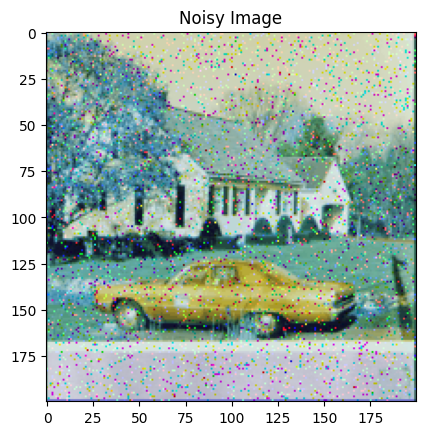

In [14]:
# Your code here
from skimage.util import random_noise
def add_salt_pepper_noise(image, density=0.05):
    # Implement using random pixels set to 0 or 255
    noisyImg = random_noise(image, mode="s&p",amount=density)
    noisyImg = np.array(255*noisyImg, dtype="uint8")
    return noisyImg
# Apply to an image and display
noisy_image = add_salt_pepper_noise(img_bgr2)
plt.figure(), plt.imshow(noisy_image, vmin=0, vmax=255), plt.title('Noisy Image')
plt.show()

### Task 12: Remove Salt and Pepper Noise Using Median Filter
Apply cv.medianBlur() to a noisy image. Experiment with kernel sizes (3,5,7) and compare results.

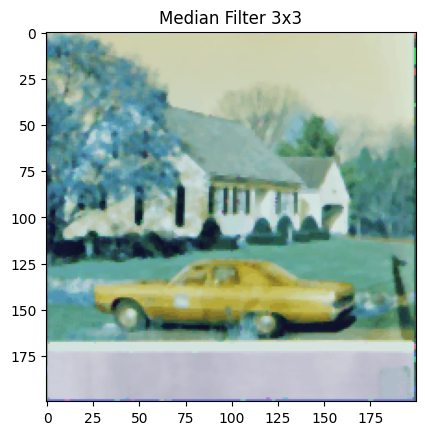

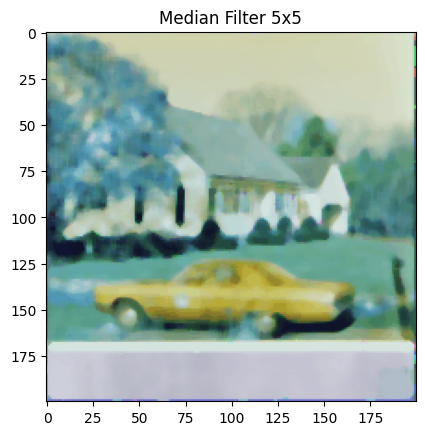

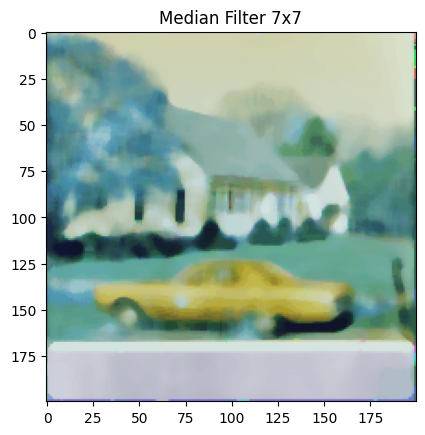

In [15]:
# Your code here
outMed1 = cv.medianBlur(noisy_image, 3)
outMed2 = cv.medianBlur(noisy_image, 5)
outMed3 = cv.medianBlur(noisy_image, 7)

plt.figure(), plt.imshow(outMed1, cmap="gray", vmin=0, vmax=255), plt.title('Median Filter 3x3')
plt.figure(), plt.imshow(outMed2, cmap="gray", vmin=0, vmax=255), plt.title('Median Filter 5x5')
plt.figure(), plt.imshow(outMed3, cmap="gray", vmin=0, vmax=255), plt.title('Median Filter 7x7')
plt.show()

### Task 13: Implement Adaptive Median Filter
Write a custom function for adaptive median filtering. It should dynamically increase window size until noise is removed or max size is reached. Apply to a noisy image and compare with standard median.

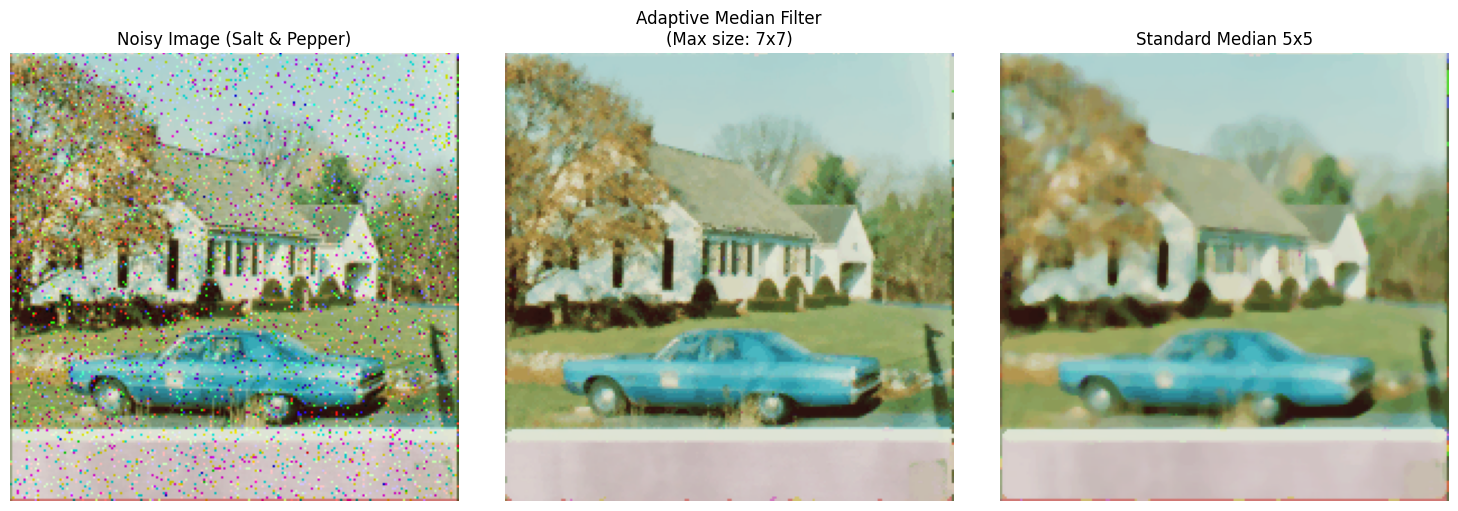

In [16]:
# Your code here
def adaptive_median_filter(image, max_size=7):
    # Implement logic: for each pixel, start with small window, increase if needed
    height, width, channels = image.shape
    pad=max_size // 2
    padded_img = cv.copyMakeBorder(image, pad, pad, pad, pad, cv.BORDER_REFLECT)
    
    filtered_img = np.zeros_like(image)
    
    for i in range(pad, height + pad):
        for j in range(pad, width + pad):
            window_size = 3  # Start with 3x3 window
            
            while window_size <= max_size:
                # Get current window
                half = window_size // 2
                window = padded_img[i-half:i+half+1, j-half:j+half+1, :]
                
                # Reshape window to (pixels, channels)
                window_flat = window.reshape(-1, channels)
                
                # Calculate statistics for all channels
                z_min = np.min(window_flat, axis=0)
                z_max = np.max(window_flat, axis=0)
                z_med = np.median(window_flat, axis=0)
                z_xy = padded_img[i, j, :]
                
                #Check if median is not impulse for all channels
                
                if np.all((z_min < z_med) & (z_med < z_max)):
                    #Check if current pixel is not impulse for all channels
                    
                    if np.all((z_min < z_xy) & (z_xy < z_max)):
                        # Pixel is not noise, keep original value
                        filtered_img[i-pad, j-pad, :] = z_xy
                    else:
                        # Pixel is noise, replace with median
                        filtered_img[i-pad, j-pad, :] = z_med
                    break
                else:
                    # Increase window size and try again
                    window_size += 2
                    if window_size > max_size:
                        # Reached max size, use median
                        filtered_img[i-pad, j-pad, :] = z_med
                        break
    
    return filtered_img
    
# Test on noisy image    
adaptive_filtered_img = adaptive_median_filter(noisy_image, max_size=7)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.title('Noisy Image (Salt & Pepper)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(adaptive_filtered_img, cv.COLOR_BGR2RGB))
plt.title('Adaptive Median Filter\n(Max size: 7x7)')
plt.axis('off')

# Compare with standard median filter
standard_median = cv.medianBlur(noisy_image, 5)
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(standard_median, cv.COLOR_BGR2RGB))
plt.title('Standard Median 5x5')
plt.axis('off')

plt.tight_layout()
plt.show()



### Task 14: Implement Bilateral Filter Function
Write a Python function to perform bilateral filtering on an image. Use Gaussian weights for both spatial and intensity. Parameters: diameter, sigma_color, sigma_space. Compare with cv.bilateralFilter().

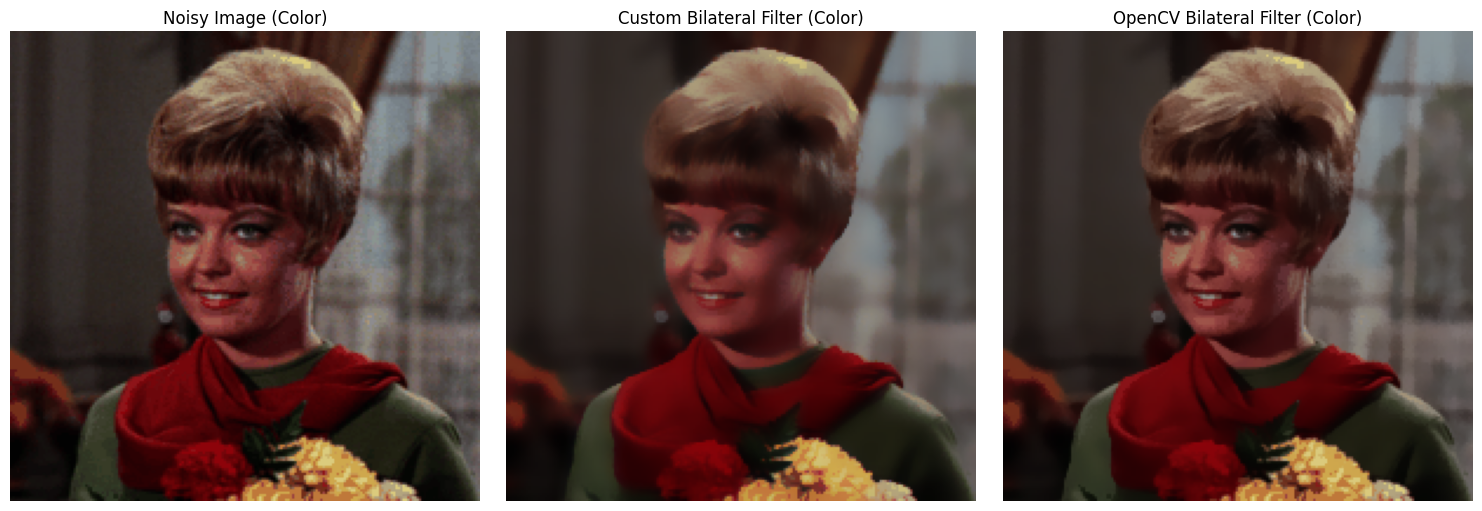

In [17]:
def custom_bilateral_filter(image, diameter, sigma_color, sigma_space):
    # Implement using nested loops or vectorized (efficiently)
    # For each pixel, compute weighted sum based on distance and intensity diff
    img = image.astype(np.float32)
    
    height, width, _ = img.shape
    filtered_img = np.zeros_like(img)
    
    radius = diameter // 2
    
    # spatial Gaussian kernel
    x, y = np.meshgrid(np.arange(-radius, radius + 1), np.arange(-radius, radius + 1))
    spatial_kernel = np.exp(-(x**2 + y**2) / (2 * sigma_space**2))
    
    padded_img = cv.copyMakeBorder(img, radius, radius, radius, radius, cv.BORDER_REFLECT)
    
    for i in range(radius, height + radius):
        for j in range(radius, width + radius):
            neighborhood = padded_img[i-radius:i+radius+1, j-radius:j+radius+1]
            
            curent_pixel = padded_img[i, j, :]

            intensity_diff = neighborhood - curent_pixel
            
            range_kernel = np.exp(-(intensity_diff**2) / (2 * sigma_color**2))
            
            bilateral_kernel = spatial_kernel[:, :, np.newaxis] * range_kernel
            
            # Normalize the kernel
            normalization = np.sum(bilateral_kernel, axis=(0, 1), keepdims=True)

            bilateral_kernel /= normalization
            
            filtered_img[i-radius, j-radius, :] = np.sum(neighborhood * bilateral_kernel, axis=(0,1))
    
    return filtered_img.astype(np.uint8)

# Apply to image, display, and compare with OpenCV's version
filtered_custom = custom_bilateral_filter(img_bgr, diameter=9, sigma_color=25, sigma_space=25)
filtered_cv = cv.bilateralFilter(img_bgr, d=9, sigmaColor=25, sigmaSpace=25)

# Display results properly for COLOR images
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
plt.title('Noisy Image (Color)')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv.cvtColor(filtered_custom, cv.COLOR_BGR2RGB))
plt.title('Custom Bilateral Filter (Color)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv.cvtColor(filtered_cv, cv.COLOR_BGR2RGB))
plt.title('OpenCV Bilateral Filter (Color)')
plt.axis('off')

plt.tight_layout()
plt.show()



### [BONUS] Task 15: Comprehensive Camera Task
Combine: Live camera feed -> grayscale -> add noise -> remove with median -> sharpen. Display all stages in separate windows.

In [18]:

# Camera setup
camera_id = 0
delay = 1  # Reduced delay for real-time
window_name = 'frame'

cap = cv.VideoCapture(camera_id)

if not cap.isOpened():
    sys.exit()

print("Press 'q' to quit, 'n' to toggle noise, 's' to toggle sharpening, '+/-' to adjust noise")

add_noise = True
do_sharpen = True
noise_density = 0.03

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    
    # Convert to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Add noise
    if add_noise:
        noisy = add_salt_pepper_noise(gray, density=noise_density)
    else:
        noisy = gray.copy()

    # Apply median filter
    median_filtered = cv.medianBlur(noisy, 5)

    # Sharpen image
    if do_sharpen:
        sharpened = cv.filter2D(median_filtered, ddepth=-1, kernel=sharpen_kernel)
    else:
        sharpened = median_filtered.copy()
    
    # Create display versions with titles
    # Convert grayscale images to BGR for consistent text color
    gray_display = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
    noisy_display = cv.cvtColor(noisy, cv.COLOR_GRAY2BGR)
    median_display = cv.cvtColor(median_filtered, cv.COLOR_GRAY2BGR)
    sharpened_display = cv.cvtColor(sharpened, cv.COLOR_GRAY2BGR)
    
    # Display all stages
    cv.imshow('1. Original Color', frame)
    cv.imshow('2. Grayscale', gray_display)
    cv.imshow('3. Noisy Image', noisy_display)
    cv.imshow('4. Median Filtered', median_display)
    cv.imshow('5. Sharpened Result', sharpened_display)
    
    # Handle keyboard input
    key = cv.waitKey(delay) & 0xFF
    if key == ord('q'):  # Quit
        break
    elif key == ord('n'):  # Toggle noise
        add_noise = not add_noise
        print(f"Noise: {'ON' if add_noise else 'OFF'}")
    elif key == ord('s'):  # Toggle sharpening
        do_sharpen = not do_sharpen
        print(f"Sharpening: {'ON' if do_sharpen else 'OFF'}")
    elif key == ord('+'):  # Increase noise
        noise_density = min(0.1, noise_density + 0.01)
        print(f"Noise density: {noise_density:.2f}")
    elif key == ord('-'):  # Decrease noise
        noise_density = max(0.01, noise_density - 0.01)
        print(f"Noise density: {noise_density:.2f}")

cap.release()
cv.destroyAllWindows()

Press 'q' to quit, 'n' to toggle noise, 's' to toggle sharpening, '+/-' to adjust noise


### [BONUS]Task 16: Comprehensive Video Task
Similar to Task 18 but for a video file. Save the final processed video.

In [19]:
# Your code here

def process_video(input_path, output_path, noise_density=0.03, do_sharpen=True):
    
    # Open video file
    cap = cv.VideoCapture(input_path)
    
    if not cap.isOpened():
        print(f"Error: Cannot open video file {input_path}")
        return False
    
    # Get video properties
    fps = int(cap.get(cv.CAP_PROP_FPS))
    width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    
    # Define codec and create VideoWriter
    fourcc = cv.VideoWriter_fourcc(*'XVID')
    out = cv.VideoWriter(output_path, fourcc, fps, (width, height), isColor=False)
    
    add_noise = True
    do_sharpen = True
    noise_density = 0.03
    show_preview = True

    print(f"Processing video: {input_path}")
    print(f"Resolution: {width}x{height}, FPS: {fps}, Total frames: {total_frames}")
    print("'q' - Quit processing")
    print("'n' - Toggle noise on/off")
    print("'s' - Toggle sharpening on/off")
    print("'+' - Increase noise density")
    print("'-' - Decrease noise density")
    print("'p' - Toggle preview on/off") 

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Processing pipeline
        # 1. Convert to grayscale
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        
        if add_noise:
            noisy = add_salt_pepper_noise(gray, density=noise_density)
        else:
            noisy = gray.copy()
        
        median_filtered = cv.medianBlur(noisy, 5)
        
        if do_sharpen:
            final = cv.filter2D(median_filtered, ddepth=-1, kernel=sharpen_kernel)
        else:
            final = median_filtered
        
        # Write processed frame to output video
        out.write(final)
        
        # Display progress (optional)
        frame_count += 1
        if show_preview:
            # Create preview with all stages
            preview_scale = 0.5
            preview_gray = cv.resize(gray, (0, 0), fx=preview_scale, fy=preview_scale)
            preview_noisy = cv.resize(noisy, (0, 0), fx=preview_scale, fy=preview_scale)
            preview_median = cv.resize(median_filtered, (0, 0), fx=preview_scale, fy=preview_scale)
            preview_final = cv.resize(final, (0, 0), fx=preview_scale, fy=preview_scale)
            
            top_row = np.hstack((cv.cvtColor(preview_gray, cv.COLOR_GRAY2BGR),
                                    cv.cvtColor(preview_noisy, cv.COLOR_GRAY2BGR)))
            bottom_row = np.hstack((cv.cvtColor(preview_median, cv.COLOR_GRAY2BGR),
                                       cv.cvtColor(preview_final, cv.COLOR_GRAY2BGR)))
            preview = np.vstack((top_row, bottom_row))
            cv.imshow('Processing Preview', preview)
        
        # Handle keyboard input
        key = cv.waitKey(0) & 0xFF
        if key == ord('q'):  # Quit
            print("Processing stopped by user")
            break
        elif key == ord('n'):  # Toggle noise
            add_noise = not add_noise
            print(f"Noise: {'ON' if add_noise else 'OFF'}")
        elif key == ord('s'):  # Toggle sharpening
            do_sharpen = not do_sharpen
            print(f"Sharpening: {'ON' if do_sharpen else 'OFF'}")
        elif key == ord('+'):  # Increase noise
            noise_density = min(0.1, noise_density + 0.01)
            print(f"Noise density: {noise_density:.2f}")
        elif key == ord('-'):  # Decrease noise
            noise_density = max(0.01, noise_density - 0.01)
            print(f"Noise density: {noise_density:.2f}")
        elif key == ord('p'):  # Toggle preview
            show_preview = not show_preview
            if not show_preview:
                cv.destroyWindow('Video Processing Preview')
            print(f"Preview: {'ON' if show_preview else 'OFF'}")
    
    # Release everything
    cap.release()
    out.release()
    cv.destroyAllWindows()
    
    print(f"Processing complete! Output saved to: {output_path}")
    return True

# Example usage
if __name__ == "__main__":
    # Replace with your video file path
    input_video = r"C:\Users\OPT\OneDrive\Desktop\sky\Session1\Task\WhatsApp Video 2025-09-10 at 16.14.10_c0714314.mp4"  # Change this to your video file
    output_video = "processed_video.avi"
    
    # Process the video
    success = process_video(input_video, output_video, noise_density=0.03, do_sharpen=True)
    
    if success:
        print("Video processing completed successfully!")
    else:
        print("Video processing failed!")

Processing video: C:\Users\OPT\OneDrive\Desktop\sky\Session1\Task\WhatsApp Video 2025-09-10 at 16.14.10_c0714314.mp4
Resolution: 480x848, FPS: 30, Total frames: 32
'q' - Quit processing
'n' - Toggle noise on/off
's' - Toggle sharpening on/off
'+' - Increase noise density
'-' - Decrease noise density
'p' - Toggle preview on/off
Processing stopped by user
Processing complete! Output saved to: processed_video.avi
Video processing completed successfully!


### Task 17: Performance Comparison
Time the execution of standard median vs adaptive median on a large noisy image. Discuss when adaptive median filter is better.

Starting performance comparison...
Adding noise...

Testing filter size: 3x3
  Running standard median filter...
  Running adaptive median filter...
  Standard: 0.000s, 
  Adaptive: 0.955s, 
  Speed ratio: 15519.64x slower

Testing filter size: 5x5
  Running standard median filter...
  Running adaptive median filter...
  Standard: 0.000s, 
  Adaptive: 1.018s, 
  Speed ratio: 2436.18x slower

Testing filter size: 7x7
  Running standard median filter...
  Running adaptive median filter...
  Standard: 0.002s, 
  Adaptive: 1.067s, 
  Speed ratio: 614.13x slower


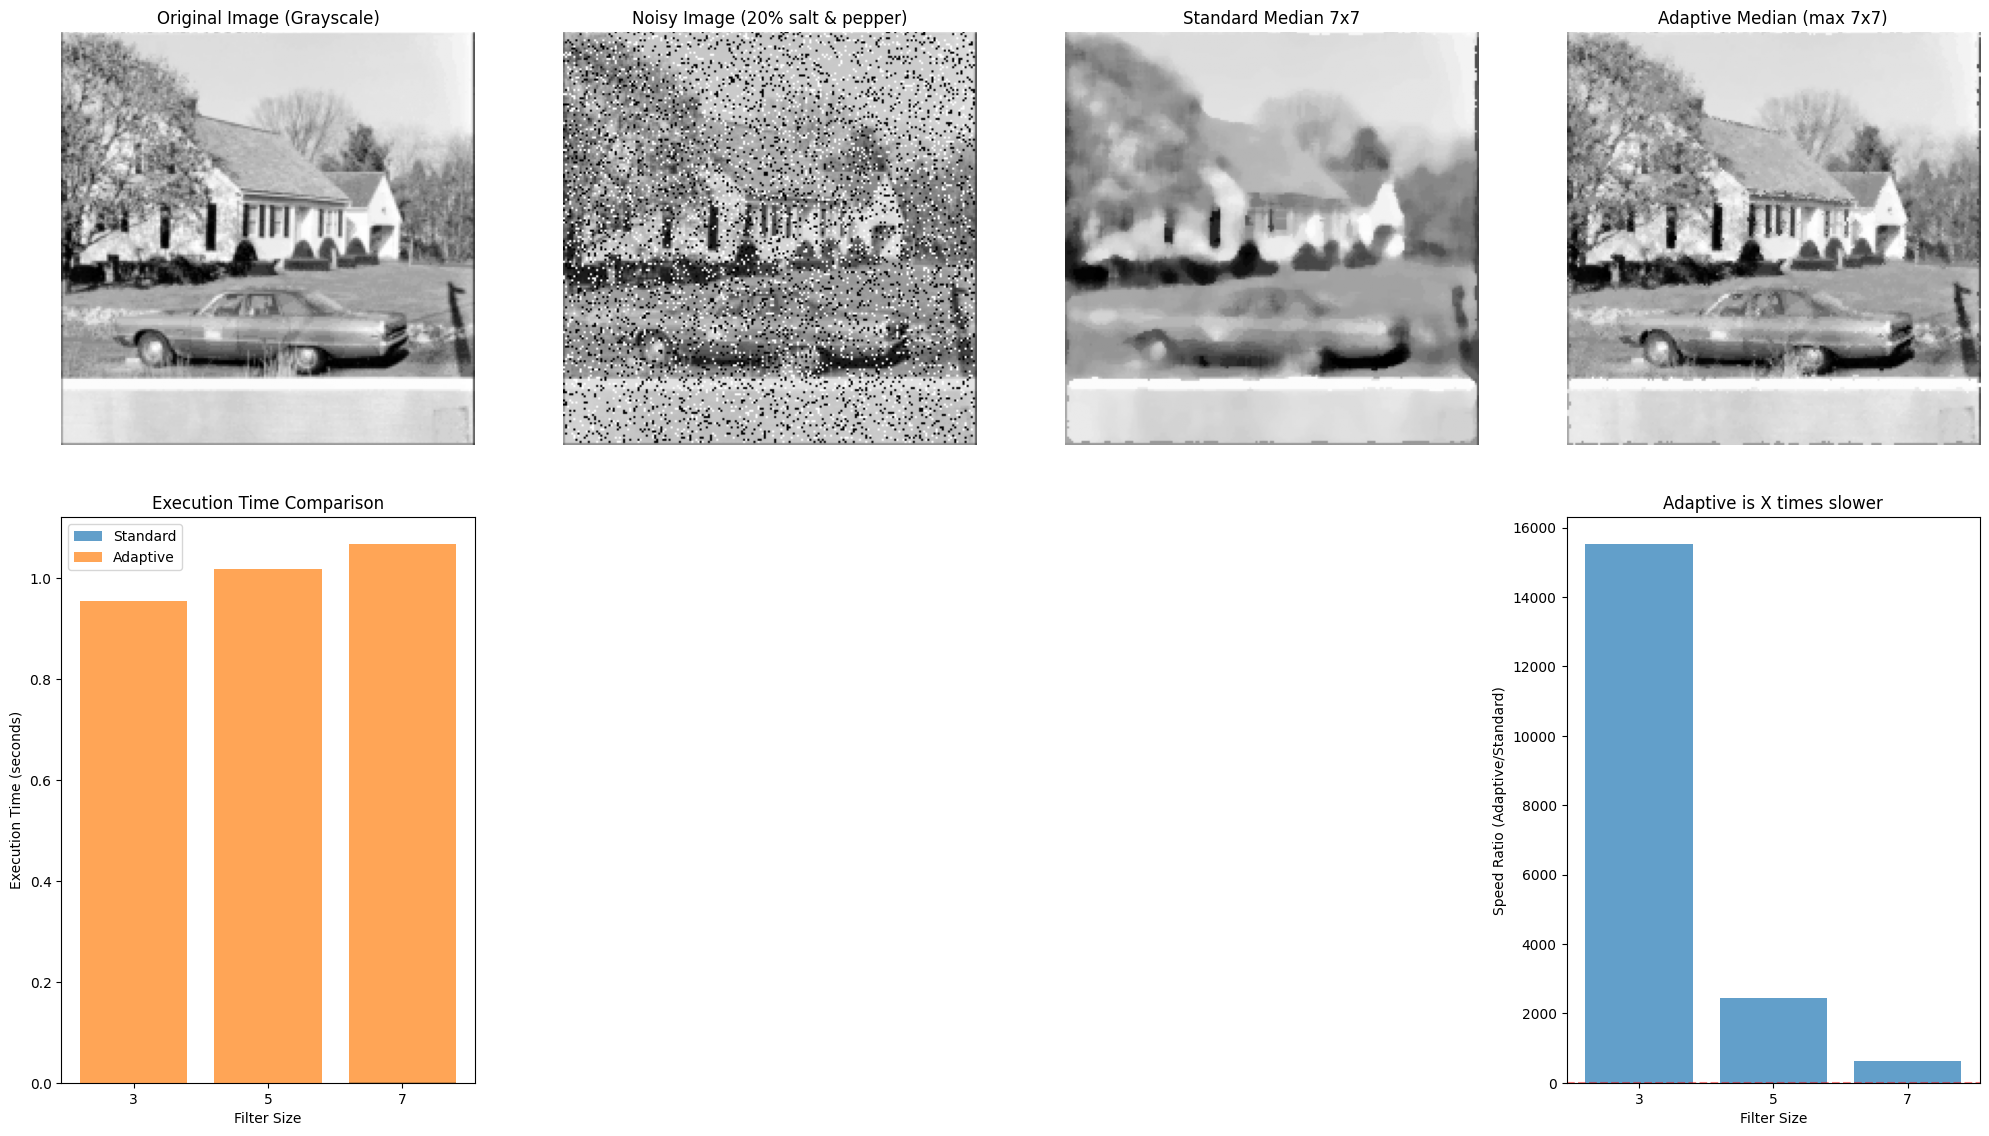


PERFORMANCE COMPARISON SUMMARY
Size   Std Time   Adapt Time   Speed Ratio 
--------------------------------------------------------------------------------
3      0.000      0.955        15519.64     
5      0.000      1.018        2436.18      
7      0.002      1.067        614.13       


In [28]:
import time
def performance_comparison():
    
    # Convert to grayscale first for fair comparison
    if len(img_bgr2.shape) == 3:
        test_image = cv.cvtColor(img_bgr2, cv.COLOR_BGR2GRAY)
    else:
        test_image = img_bgr2.copy()
    
    # Add heavy salt-and-pepper noise
    print("Adding noise...")
    noisy_image = add_salt_pepper_noise(test_image, density=0.2)  # 20% noise
    
    # Test different filter sizes
    filter_sizes = [3, 5, 7]
    results = {}
    
    for size in filter_sizes:
        print(f"\nTesting filter size: {size}x{size}")
        
        # Standard Median Filter
        print("  Running standard median filter...")
        start_time = time.time()
        std_median = cv.medianBlur(noisy_image, size)
        std_time = time.time() - start_time
        
        # Adaptive Median Filter
        print("  Running adaptive median filter...")
        start_time = time.time()
        adapt_median = adaptive_median_filter(noisy_image, size)
        adapt_time = time.time() - start_time
        
        
        results[size] = {
            'std_time': std_time,
            'adapt_time': adapt_time,
        }
        
        print(f"  Standard: {std_time:.3f}s, ")
        print(f"  Adaptive: {adapt_time:.3f}s, ")
        print(f"  Speed ratio: {adapt_time/std_time:.2f}x slower")
    
    return test_image, noisy_image, results

def plot_results(test_image, noisy_image, results):    
    # Display images
    plt.figure(figsize=(20, 12))
    
    # Original and noisy images
    plt.subplot(2, 4, 1)
    plt.imshow(test_image, cmap='gray')
    plt.title('Original Image (Grayscale)')
    plt.axis('off')
    
    plt.subplot(2, 4, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image (20% salt & pepper)')
    plt.axis('off')
    
    # Filtered images for size 7
    std_7 = cv.medianBlur(noisy_image, 7)
    adapt_7 = adaptive_median_filter(noisy_image, 7)
    
    plt.subplot(2, 4, 3)
    plt.imshow(std_7, cmap='gray')
    plt.title('Standard Median 7x7')
    plt.axis('off')
    
    plt.subplot(2, 4, 4)
    plt.imshow(adapt_7, cmap='gray')
    plt.title('Adaptive Median (max 7x7)')
    plt.axis('off')
    
    # Performance comparison
    sizes = list(results.keys())
    std_times = [results[s]['std_time'] for s in sizes]
    adapt_times = [results[s]['adapt_time'] for s in sizes]
    
    plt.subplot(2, 4, 5)
    plt.bar([str(s) for s in sizes], std_times, alpha=0.7, label='Standard')
    plt.bar([str(s) for s in sizes], adapt_times, alpha=0.7, label='Adaptive')
    plt.xlabel('Filter Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time Comparison')
    plt.legend()
    
    # Speed ratio
    speed_ratios = [results[s]['adapt_time']/results[s]['std_time'] for s in sizes]
    
    plt.subplot(2, 4, 8)
    plt.bar([str(s) for s in sizes], speed_ratios, alpha=0.7)
    plt.xlabel('Filter Size')
    plt.ylabel('Speed Ratio (Adaptive/Standard)')
    plt.title('Adaptive is X times slower')
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("\n" + "="*80)
    print("PERFORMANCE COMPARISON SUMMARY")
    print("="*80)
    print(f"{'Size':<6} {'Std Time':<10} {'Adapt Time':<12} {'Speed Ratio':<12}")
    print("-"*80)
    
    for size in sizes:
        r = results[size]
        print(f"{size:<6} {r['std_time']:<10.3f} {r['adapt_time']:<12.3f} {r['adapt_time']/r['std_time']:<12.2f} ")

# Run the performance comparison
print("Starting performance comparison...")
test_image, noisy_image, results = performance_comparison()

# Plot and discuss results
plot_results(test_image, noisy_image, results)
